# SMS SPAM DETECTION USING NLP

### **Table of Contents**  
1. **Introduction**  
2. **Installing Required Packages**  
3. **Importing Required Packages and Modules**  
4. **Data Preprocessing**  
   - Loading the Dataset  
   - Initial Data Exploration  
   - Exploring the Labels  
   - Handling Missing and Duplicate Data(Cleaning the data)  
   - Visualizing the Label Distribution  
   - Label Encoding
   - Adding and Analyzing Message Length  
   - Visualizing Message Length and special chars columns 
5. **Word Cloud Visualisation** 
6. **Model Training** 
   - Converting data into vector form 
   - Training and Testing Data Split  
   - Training the Model  - Naive Bayes  
7. **Evaluation**    
   - Performance Metrics
   - Confusion matrix visualization
   - Saving the model using the pickle module - it enables reusing the trained model
   - Checking the model using custom inputs

**Introduction**

This project focuses on detecting spam messages in SMS using Natural Language Processing (NLP) techniques. We utilize the UCI SMS dataset, which contains labeled messages. The objective is to build a **classification model** to predict whether a given text message is spam or not, using techniques such as text preprocessing, vectorization, and classification. Naive Bayes Algorithm is used in this project.

1. **Installing required packages** - Run only once

 - Install all necessary libraries, including pandas, numpy, nltk, scikit-learn, matplotlib, seaborn, and wordcloud.

In [1]:
# %pip install pandas
# %pip install matplotlib
# %pip install seaborn
# %pip install scikit-learn
# %pip install sklearn
# %pip install wordcloud matplotlib

**2. Importing Required Packages and Modules**

  - Import essential libraries for data manipulation, visualization, and ML model training.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pickle
import re

# 3. Data Preprocessing


**1. Loading the Dataset**

 - Load the SMS dataset containing two columns: labels (ham or spam) and messages

 https://archive.ics.uci.edu/dataset/228/sms+spam+collection - Dataset Link



**About the Dataset**
- Labels:
  - Ham: Not spam.
  - Spam: Unwanted or unsolicited messages.
- Messages: Contains the actual SMS text data.
- Dataset Size: 5,573 rows.

In [3]:
# Load the dataset - , encoding = 'latin-1'
df = pd.read_csv('spam_utf.csv')

# Inspect the dataset
print(df.head())

  labels                                           messages Unnamed: 2  \
0    ham  Go until jurong point, crazy.. Available only ...        NaN   
1    ham                      Ok lar... Joking wif u oni...        NaN   
2   spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3    ham  U dun say so early hor... U c already then say...        NaN   
4    ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [4]:
# Remove the unwanted columns
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

# Display the remaining columns to verify
print(df.columns)

Index(['labels', 'messages'], dtype='object')


In [5]:
# Assign custom column names
df.columns = ["labels", "messages"]

# Display the DataFrame
print(df.head())

  labels                                           messages
0    ham  Go until jurong point, crazy.. Available only ...
1    ham                      Ok lar... Joking wif u oni...
2   spam  Free entry in 2 a wkly comp to win FA Cup fina...
3    ham  U dun say so early hor... U c already then say...
4    ham  Nah I don't think he goes to usf, he lives aro...


In [6]:
print(df['labels'].value_counts())


labels
ham     4825
spam     747
Name: count, dtype: int64


**2. Initial Data Exploration**

 - Inspect the dataset using head(), describe(), info(), and columns.
Rename columns and remove empty or irrelevant columns for consistency

In [7]:
# Display the first few rows to confirm
print(df.head(10))

  labels                                           messages
0    ham  Go until jurong point, crazy.. Available only ...
1    ham                      Ok lar... Joking wif u oni...
2   spam  Free entry in 2 a wkly comp to win FA Cup fina...
3    ham  U dun say so early hor... U c already then say...
4    ham  Nah I don't think he goes to usf, he lives aro...
5   spam  FreeMsg Hey there darling it's been 3 week's n...
6    ham  Even my brother is not like to speak with me. ...
7    ham  As per your request 'Melle Melle (Oru Minnamin...
8   spam  WINNER!! As a valued network customer you have...
9   spam  Had your mobile 11 months or more? U R entitle...


In [8]:
#Describe
print(df.describe())

       labels                messages
count    5572                    5572
unique      2                    5169
top       ham  Sorry, I'll call later
freq     4825                      30


In [9]:
# Statistics
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   labels    5572 non-null   object
 1   messages  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


In [10]:
# Columns of dataset
df.columns

Index(['labels', 'messages'], dtype='object')

**3. Exploring the Labels**

 - Analyze the labels column using value_counts() to understand the distribution of spam and non-spam messages.

In [11]:
# Exploring the result column
df['labels']

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: labels, Length: 5572, dtype: object

In [12]:
# Counting the results occurences in the labels column
df['labels'].value_counts()

labels
ham     4825
spam     747
Name: count, dtype: int64

**4. Handling Missing and Duplicate Data**

 - Check for null values and remove rows with missing data.
Identify and retain only the first occurrence of duplicate rows.

In [13]:
# Checking for any null values
df.isnull()

,labels,messages
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
5567,False,False
5568,False,False
5569,False,False
5570,False,False


In [14]:
# Printing null valuez from each column
df.isnull().sum()

labels      0
messages    0
dtype: int64

In [15]:
# Dropping empty rows
df.dropna()

,labels,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [16]:
# Checking for any duplicated rows
df.duplicated().sum()

np.int64(403)

In [17]:
# Dropping the duplicated rows
df = df.drop_duplicates(keep = 'first')

In [18]:
# Checking if any more duplicates rows exist
df.duplicated().sum()

np.int64(0)

**5. Visualizing the Label Distribution**

 - Create a pie chart to visualize the proportion of spam and non-spam messages

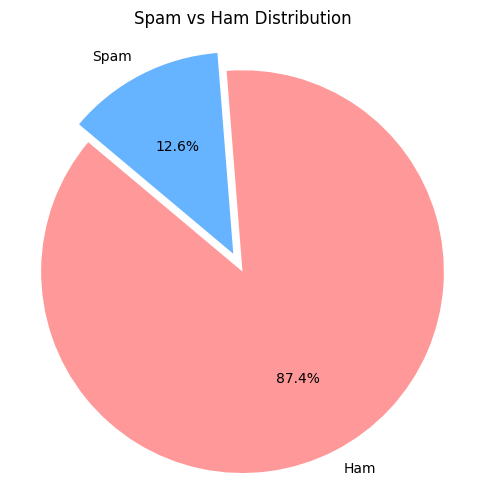

In [19]:
# Pie chart for label distribution
label_counts = df['labels'].value_counts()
labels = ['Ham', 'Spam']
sizes = label_counts.values
colors = ['#ff9999','#66b3ff']  # Colors for Ham and Spam

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, explode=(0.1, 0))
plt.title('Spam vs Ham Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

**6. Encoding Labels**

- For easy training

In [20]:
# Encode labels
df['labels'] = df['labels'].apply(lambda x: 1 if x == 'spam' else 0)

**7. Adding and Analyzing Message Length and special characters count.**

 - For improved accuracy
 - Adding a special characters column.
 - Adding a length column to store the character count of each message.

In [21]:
# Adding a special characters column.

import re

# Function to count special characters in a message
def count_special_characters(text):
    # Regex pattern to match all non-alphanumeric characters
    return len(re.findall(r'[^a-zA-Z0-9\s]', text))

# Apply the function to count special characters
special_char_counts = df['messages'].apply(count_special_characters)

# Add special character count as a temporary Series to the original DataFrame
df['special_char_count'] = special_char_counts

**Visualizing Special Char Count in Messages**

 - Create a histogram to visualize Distribution of Special Character Count in Messages (Spam vs Ham).

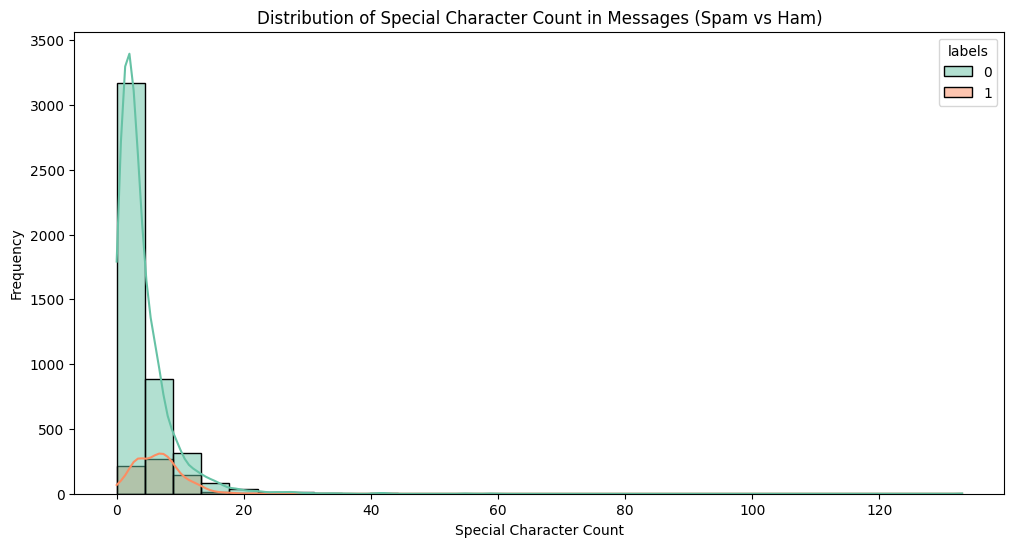

In [22]:
# Visualize the distribution of special characters count for spam and ham separately
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='special_char_count', hue='labels', bins=30, kde=True, palette='Set2')

plt.title('Distribution of Special Character Count in Messages (Spam vs Ham)')
plt.xlabel('Special Character Count')
plt.ylabel('Frequency')
plt.show()

In [23]:
# Adding a length column to store the character count of each message.

df["length"] = df["messages"].apply(len)
df.sort_values(by = "length", ascending = False).head(10)

,labels,messages,special_char_count,length
1084,0,For me the love should start with attraction.i...,22,910
1862,0,The last thing i ever wanted to do was hurt yo...,34,790
2433,0,Indians r poor but India is not a poor country...,55,632
1578,0,How to Make a girl Happy? It's not at all diff...,133,611
2157,0,Sad story of a Man - Last week was my b'day. M...,59,588
2379,0,"Good evening Sir, hope you are having a nice d...",15,482
3015,0,"&lt;#&gt; is fast approaching. So, Wish u a v...",27,461
1512,0,"Hey sweet, I was wondering when you had a mome...",14,458
2369,0,A Boy loved a gal. He propsd bt she didnt mind...,25,450
2407,0,Solve d Case : A Man Was Found Murdered On &l...,42,444


**Visualizing Message Length**

 - Create a histogram to compare the message lengths for spam and non-spam messages.

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

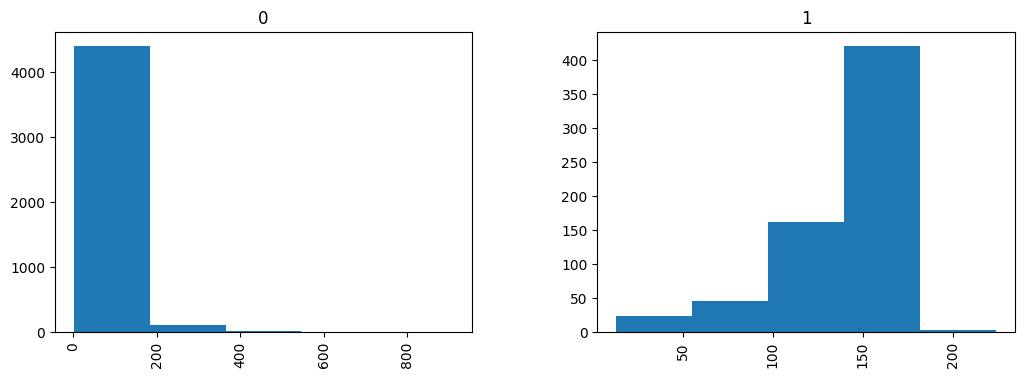

In [24]:
df.hist(column = 'length', by ='labels',figsize=(12,4), bins = 5)

# 5. Word Cloud Visualization

 - Generate separate word clouds for spam and non-spam messages to understand common words used in each category.

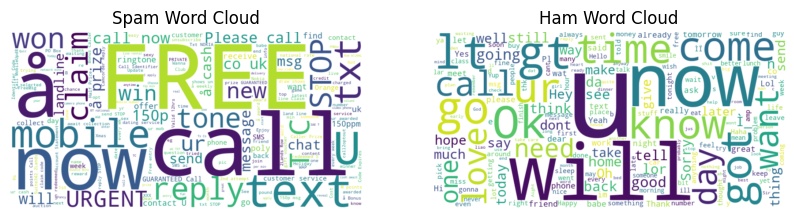

In [25]:
from wordcloud import WordCloud

# Separate spam and ham messages
spam_messages = df[df['labels'] == 1]['messages']
ham_messages = df[df['labels'] == 0]['messages']

# Create word clouds
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(spam_messages))
ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(ham_messages))

# Plot word clouds
plt.figure(figsize=(10, 8))

# Plot spam word cloud
plt.subplot(1, 2, 1)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Spam Word Cloud")

# Plot ham word cloud
plt.subplot(1, 2, 2)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Ham Word Cloud")

plt.show()


# 6. Model Training

**1. Training and Testing Data Split**

 - Split the dataset into training (70%) and testing (30%) sets.

In [26]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['messages'], df['labels'], test_size=0.2, random_state=42)

**2. Using CountVectorizer to transform the messages into vector form**

In [27]:
# Convert text data to numerical features using CountVectorizer
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

**3. Initialising and fitting the training data into the model**

In [28]:
# Initialize the Naive Bayes model
nb_model = MultinomialNB()

# Train the model
nb_model.fit(X_train_vec, y_train)

MultinomialNB()

# 7. Evaluation

**Performance Metrics**

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Predict on the test set
y_pred = nb_model.predict(X_test_vec)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Optional: Confusion matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)


Accuracy: 0.99
Precision: 0.99
Recall: 0.91
F1-score: 0.95

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       889
           1       0.99      0.91      0.95       145

    accuracy                           0.99      1034
   macro avg       0.99      0.95      0.97      1034
weighted avg       0.99      0.99      0.99      1034

Confusion Matrix:
[[887   2]
 [ 13 132]]


In [30]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


**A Confusion Matrix** is a tool to evaluate the performance of a classification model by comparing actual labels with predicted labels. \\
It has four main components:

 - True Positives (TP): Correctly classified as the positive class (e.g., spam correctly predicted as spam).
 - True Negatives (TN): Correctly classified as the negative class (e.g., not spam correctly predicted as not spam).
 - False Positives (FP): Incorrectly classified as the positive class (e.g., not spam predicted as spam).
 - False Negatives (FN): Incorrectly classified as the negative class (e.g., spam predicted as not spam).
Insights from

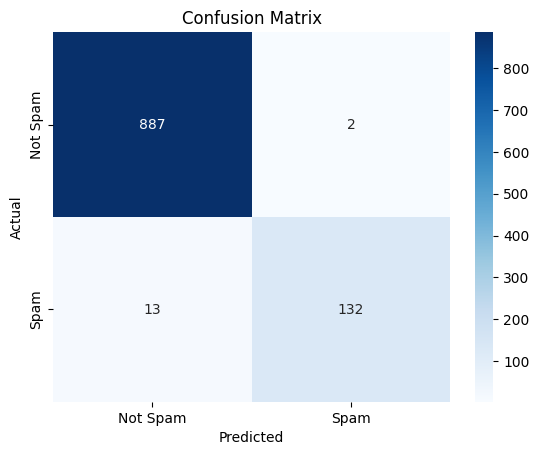

In [31]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

**Saving the model using the pickle module - it enables reusing the trained model**

In [32]:
import pickle

# Assuming you've already trained your vectorizer and model
# Save the CountVectorizer
with open('count_vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)

# Save the Naive Bayes model
with open('naive_bayes_model.pkl', 'wb') as model_file:
    pickle.dump(nb_model, model_file)

**Checking the model using custom inputs**

In [33]:
# Custom input text
custom_texts = [
    "Congratulations, you have won a free prize! Claim now.",
    "Hey, how are you? Let's catch up soon.",
    "Urgent! Your bank account has been compromised. Call now."
]

# Vectorize the custom input text
custom_texts_vec = vectorizer.transform(custom_texts)

# Predict the labels for custom inputs
predictions = nb_model.predict(custom_texts_vec)

# Map the predictions back to human-readable labels
label_map = {1: "spam", 0: "ham"}  # 1 = spam, 0 = ham
predicted_labels = [label_map[pred] for pred in predictions]

# Display the predictions
for text, label in zip(custom_texts, predicted_labels):
    print(f"Text: {text}\nPredicted Label: {label}\n")

Text: Congratulations, you have won a free prize! Claim now.
Predicted Label: spam

Text: Hey, how are you? Let's catch up soon.
Predicted Label: ham

Text: Urgent! Your bank account has been compromised. Call now.
Predicted Label: spam



# Comparing Different Models


Confusion Matrix for Naive Bayes:
 [[887   2]
 [ 13 132]]

Confusion Matrix for Random Forest:
 [[888   1]
 [ 25 120]]

Confusion Matrix for KNN:
 [[889   0]
 [ 94  51]]

Confusion Matrix for Decision Tree:
 [[872  17]
 [ 18 127]]

Confusion Matrix for Logistic Regression:
 [[885   4]
 [ 18 127]]

Confusion Matrix for Extra Trees:
 [[888   1]
 [ 18 127]]

Confusion Matrix for SVC:
 [[889   0]
 [ 12 133]]
                 Model  Accuracy  Precision    Recall  F1-Score
0          Naive Bayes  0.985493   0.985488  0.985493  0.985252
1        Random Forest  0.974855   0.975299  0.974855  0.973888
2                  KNN  0.909091   0.917784  0.909091  0.889574
3        Decision Tree  0.966151   0.966056  0.966151  0.966102
4  Logistic Regression  0.978723   0.978580  0.978723  0.978267
5          Extra Trees  0.981625   0.981823  0.981625  0.981140
6                  SVC  0.988395   0.988549  0.988395  0.988183


C:\Users\prava\AppData\Local\Temp\ipykernel_24876\525562356.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Accuracy", data=results_df, palette="viridis")


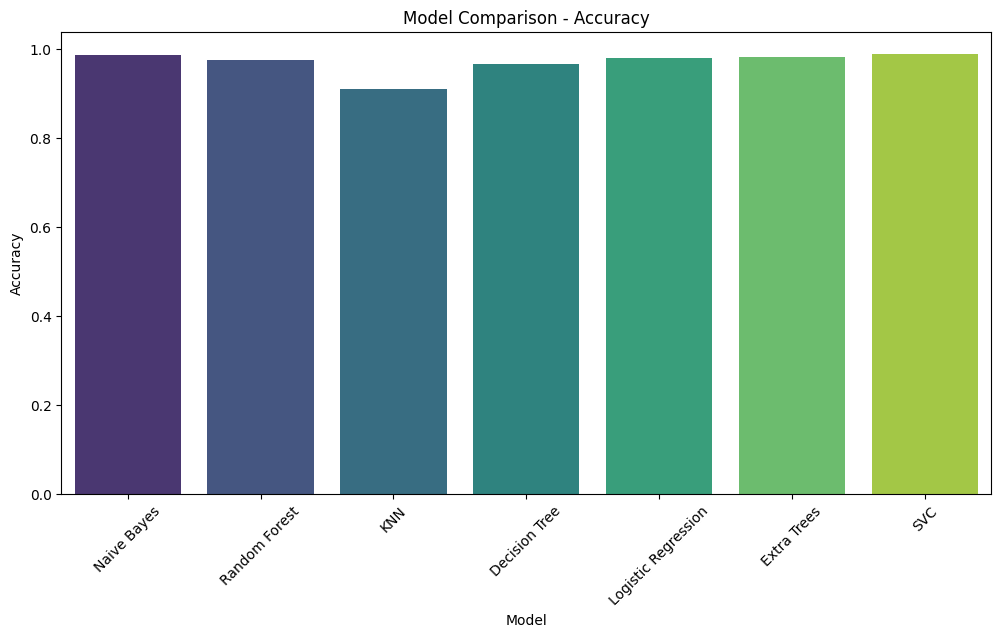

In [34]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define a list of models to evaluate
models = {
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Extra Trees": ExtraTreesClassifier(),
    "SVC": SVC(kernel='linear', class_weight='balanced')
}

# Initialize results dictionary
results = []

# Evaluate each model
for model_name, model in models.items():
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    confusion = confusion_matrix(y_test, y_pred)

    # Append results
    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": report["weighted avg"]["precision"],
        "Recall": report["weighted avg"]["recall"],
        "F1-Score": report["weighted avg"]["f1-score"]
    })

    # Print confusion matrix (optional)
    print(f"\nConfusion Matrix for {model_name}:\n", confusion)

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display results
print(results_df)

# Visualize results
plt.figure(figsize=(12, 6))
sns.barplot(x="Model", y="Accuracy", data=results_df, palette="viridis")
plt.title("Model Comparison - Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.show()